<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 376 

## K-Means Clustering for Classification

#### Robert Propper, Undergraduate Student, The University of Texas at Austin

##### [LinkedIn](https://www.linkedin.com/in/robertpropper/)

#### Supervised by:

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)


### PGE 376: K-Means Clustering for Classification:
The main focus of this workflow is conducting k-means clustering on classified data. The workflow will split the data set into two classifications and run kmeans clusturing within each group. A decision boundary will then be placed in respect to the centroids. Finally, The number of centroids will be hypertuned based on the score of the performed Kmeans. Here is a short summary of K-means clusturing.

#### K-Means Clustering
K-means clustering is a "simple" unsupervised machine learning algorithm that is used to solve clustering problems. It follows a simple procedure of classifying a given data set into some groups, number of groups determined by the user. The groups are then positioned as points and data points are related to the nearest group, then the orignal groups are replaced by a calculated better position and finally the process starts over using the new recalculations until a desired result is reached.

#### Real Life Applications
In this workflow a user could estimate if a well in a similar sand will produce a high or low amount of production based on two features. K-means clustering also has uses in search engines, marketing, statistics, and astronomy. It is a great way to sift through large amounts of data by grouping multiple points and viewing just the points of a desired group. 


#### Workflow Goals
The goals of this workflow is the following:
* Greatly improve my understanding of K-means clustering 
* Get a more hands on approach coding machine learning algorithms

#### Getting Started
This workflow only requires one data set named unconventional_MV_v4 which can be found [here](https://github.com/GeostatsGuy/GeoDataSets):

* [Unconventional_MV_v4](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV_v4.csv)

#### Import Required Packages

These packages are standard and should be installed with Anaconda 3.

In [1]:
#Import packages 
       
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from sklearn.cluster import KMeans        # Perform Kmeans clustring automatically for easier hypertuning
from sklearn import svm                   # For decision boundary
from sklearn import neighbors             # For decision boundary visualization

#### Set a working directory 
It is always great practice to work within a single directory, make sure to include the downloaded data set in your respective directory. 

In [2]:
#Set directory 

os.chdir("/Users/robert/Desktop/PGE 376 - Project")                                       

#### Loading Data

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specficy the name / variable representing that new object.

```python
df = pd.read_csv('unconv_MV_c4.csv') 

Pandas will give us in a nice, easy to read table. The original data set will be manipulated later on to only include the key features we are working with in this workflow.

* Feature One - Porosity 
* Feature Two - Brittleness

These features will then be classified based on whether their respective production value is "High" or "Low" which will be discussed further down.

In [3]:
#Read in data 

df = pd.read_csv('unconv_MV_v4.csv')
df[:7]

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4017.374438
6,7,13.49,3.60,2.93,63.71,0.80,1.85,2952.812773


In [4]:
#Create a subset data for easier reading and manipulating 

df_data = df.iloc[:,[1,4,7]]
df_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Por,197.0,14.901117,2.901694,6.550000,12.890000,15.040000,17.200000,23.550000
Brittle,197.0,48.283299,14.188784,10.940000,37.760000,49.910000,58.300000,84.330000
Prod,197.0,3807.074839,1488.971337,839.822063,2685.799399,3583.292064,4612.730948,7671.102916


#### Normalizing the Data
It is **extremely important to normalize our data** when working with K-means clusturing. This is because throughout the K-means iterations the data values are using Eucledian distance to determine how far away a data point is from a centroid. The distance calculated is based on x-y coordinates, so having two features with very unsimilar ranges would yield incorrect distances. Thus, resulting in incorrectly placed centorids which we do not want!

* Porosity Range - [6.5 - 23.5]
* Brittle Range  - [10.9 - 84.3] 

These ranges need to be normalized and are so in the following code.

In [7]:
#Normalizing the Data 
pormin = df_data['Por'].min(); pormax = df_data['Por'].max()
Brittlemin = df_data['Brittle'].min(); Brittlemax = df_data['Brittle'].max()

df_data['Norm_Por'] = (df_data['Por']-pormin)/(pormax - pormin)
df_data['Norm_Brittle'] = (df_data['Brittle']-Brittlemin)/(Brittlemax - Brittlemin)

df_data
 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Por,Brittle,Prod,Norm_Por,Norm_Brittle
0,12.08,81.40,1695.360819,0.325294,0.960076
1,12.38,46.17,3007.096063,0.342941,0.480038
2,14.02,72.80,2531.938259,0.439412,0.842894
3,17.67,39.81,5288.514854,0.654118,0.393378
4,17.52,10.94,2859.469624,0.645294,0.000000
...,...,...,...,...,...
192,17.13,51.45,5726.071238,0.622353,0.551983
193,11.95,67.18,2203.839738,0.317647,0.766317
194,17.99,44.32,5949.843842,0.672941,0.454830
195,12.12,57.07,2701.389046,0.327647,0.628560


#### Labeling Data Values for K-means Classification

Here we are determining whether the two features yield "High" or "Low" data. The cutoff for high data was the P50, described earlier, of the production. For this certain data set the P50 of production was 3604.

If the production value is higher than 3604 then the respective porosity and brittlness are assigned a label value of 1. Similarly, if the production is lower then it will be assigned a label value of 0. 

These labels are essential for K-means for classification as two sets of K-means Clustering are performed within the "High" and "Low" porosity and brittlness data values.

In [8]:
#Labeling Data to include a 1 or 0 to indicate higher production
#If data label = 1: Means high production value

df_data.insert(5,"label",0)

for i in range(0,len(df_data)-1):
    if df_data.iloc[i,2] > 3604: #P50 of prodcuction data
        df_data["label"][i] = 1.0
    else:
        df_data["label"][i] = 0.0
df_data



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,Por,Brittle,Prod,Norm_Por,Norm_Brittle,label
0,12.08,81.40,1695.360819,0.325294,0.960076,0
1,12.38,46.17,3007.096063,0.342941,0.480038,0
2,14.02,72.80,2531.938259,0.439412,0.842894,0
3,17.67,39.81,5288.514854,0.654118,0.393378,1
4,17.52,10.94,2859.469624,0.645294,0.000000,0
...,...,...,...,...,...,...
192,17.13,51.45,5726.071238,0.622353,0.551983,1
193,11.95,67.18,2203.839738,0.317647,0.766317,0
194,17.99,44.32,5949.843842,0.672941,0.454830,1
195,12.12,57.07,2701.389046,0.327647,0.628560,0


#### Regular K-Means Clustering on Data set 

We will now use our imported package of Kmeans, a more thorough description can be found here:

* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Scikit's Kmeans package automatically iterates the centroid's location and determines the best possible location for the number of groups. The great thing about Kmeans is that the number of centorids is a parameter and will be useful further down. 

It is important to note that the entire data set is being fit through Kmeans and no labels are being used. This is just a nice visualization of how fast Kmeans can cluster and what our predicitons would be for High or Low data based on no production labeling. 

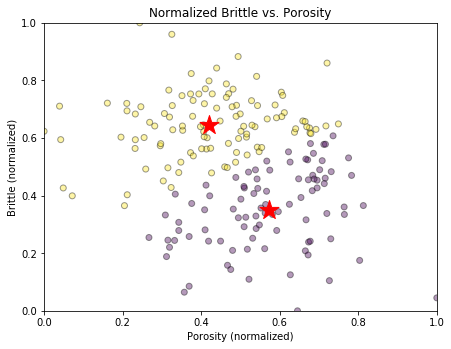

In [9]:
#Scatter plot to help see centroids. 
#Setting up Kmeans 

xy_data = df_data.iloc[:,[3,4]]
kmeans = KMeans(n_clusters=2).fit(xy_data)
y_kmeans23 = kmeans.predict(xy_data)

KcentersUN = kmeans.cluster_centers_


plt.subplot(122)
plt.scatter(df_data['Norm_Por'], df_data['Norm_Brittle'], c=y_kmeans23, cmap='viridis', alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Normalized Brittle vs. Porosity'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Brittle (normalized)')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

for i in range(0,len(KcentersUN)):
    plt.scatter(KcentersUN[i,0], KcentersUN[i,1], s=400,  marker = "*" , c="red")

#### Adding High/Low Labelled Features 

Now that the data is labelled, we can sort through each label and place its respective features into a new column. This is done for easier acess to the points and for running seperate Kmeans. 

In [10]:
#Splitting data based on label assigned earlier 

High_Por = []
Low_Por = []
High_Bri = []
Low_Bri = []

for i in range(0,len(df_data)):
    if df_data["label"][i] == 1:
        High_Por.append(df_data["Norm_Por"][i])
    else:
        Low_Por.append(df_data["Norm_Por"][i])
        
for i in range(0,len(df_data)):
    if df_data["label"][i] == 1:
        High_Bri.append(df_data["Norm_Brittle"][i])
    else:
        Low_Bri.append(df_data["Norm_Brittle"][i])

In [11]:
df_Split =  pd.DataFrame({'High_Por': pd.Series(High_Por), 'High_Brittle': pd.Series(High_Bri)\
             , 'Low_Por': pd.Series(Low_Por), 'Low_Brittle': pd.Series(Low_Bri)})


df_data = pd.concat([df_data,df_Split],axis=1)
df_data



,Por,Brittle,Prod,Norm_Por,Norm_Brittle,label,High_Por,High_Brittle,Low_Por,Low_Brittle
0,12.08,81.40,1695.360819,0.325294,0.960076,0,0.654118,0.393378,0.325294,0.960076
1,12.38,46.17,3007.096063,0.342941,0.480038,0,0.469412,0.581278,0.342941,0.480038
2,14.02,72.80,2531.938259,0.439412,0.842894,0,0.499412,0.683608,0.439412,0.842894
3,17.67,39.81,5288.514854,0.654118,0.393378,1,0.567059,0.519962,0.645294,0.000000
4,17.52,10.94,2859.469624,0.645294,0.000000,0,0.604118,0.759095,0.408235,0.719035
...,...,...,...,...,...,...,...,...,...,...
192,17.13,51.45,5726.071238,0.622353,0.551983,1,NaN,NaN,NaN,NaN
193,11.95,67.18,2203.839738,0.317647,0.766317,0,NaN,NaN,NaN,NaN
194,17.99,44.32,5949.843842,0.672941,0.454830,1,NaN,NaN,NaN,NaN
195,12.12,57.07,2701.389046,0.327647,0.628560,0,NaN,NaN,NaN,NaN


#### Performing K-Means Clustering for Classification 

Once these High/Low features are obtained, we can now perform our first clustering with classified data. 

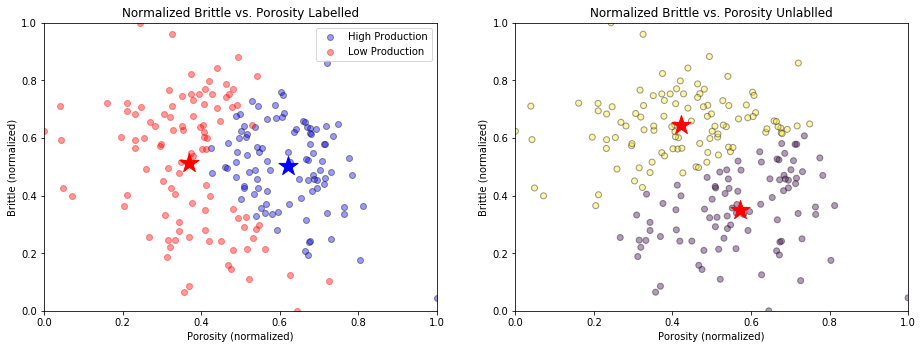

In [12]:
xy2_data = list(zip(High_Por,High_Bri))
kmeans = KMeans(n_clusters=1, random_state=0).fit(xy2_data)
y_kmeans = kmeans.predict(xy2_data)
Kcenters = kmeans.cluster_centers_



xy3_data = list(zip(Low_Por,Low_Bri))
kmeans = KMeans(n_clusters=1, random_state=0).fit(xy3_data)
y_kmeans2 = kmeans.predict(xy3_data)
Kcenters2 = kmeans.cluster_centers_

plt.subplot(121)
plt.scatter(High_Por, High_Bri, c="blue", alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black", label = "High Production")
plt.scatter(Low_Por, Low_Bri, c="red", alpha = 0.4, linewidths =1.0, verts =None, label = "Low Production")
plt.title('Normalized Brittle vs. Porosity Labelled'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Brittle (normalized)')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()

for i in range(0,len(Kcenters)):
    plt.scatter(Kcenters[i,0], Kcenters[i,1], s=400,  marker = "*" , c = 'blue')
    
for i in range(0,len(Kcenters2)):
    plt.scatter(Kcenters2[i,0], Kcenters2[i,1], s=400,  marker = "*" , c = 'red')


plt.subplot(122)
plt.scatter(df_data['Norm_Por'], df_data['Norm_Brittle'], c=y_kmeans23, cmap='viridis', alpha = 0.4, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Normalized Brittle vs. Porosity Unlablled'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Brittle (normalized)')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

for i in range(0,len(KcentersUN)):
    plt.scatter(KcentersUN[i,0], KcentersUN[i,1], s=400,  marker = "*" , c="red")

We can see a side by side comparison of Kmeans with labelled [Left] and unlabelled [Right]. One key take away from these plots is that working with labelled data would in fact yield diffrent centroid locations. 

#### Segmentation of Feature Space

One of the main objectives of K-means for Classification is the ability to segment the feature space dependent on number of centroids in each classification. Using the same labelled K-means plot from above, a decision boundary line is formed via a k-nearest neighbor method where the centorids dictate how the boundary line moves. The coding help used for k-nearest neighbor can be found here:

* https://scikit-learn.org/stable/modules/neighbors.html
* https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

From this boundary line, if you were to have the maximum number of centroids [96] you would expect an extremely complicated and overfit line. Now if you were to have the minimum number of centroids [2] you would expect a linear perpendicular bisector line between the two prototypes. Let us now see if we achieve this linear line. 

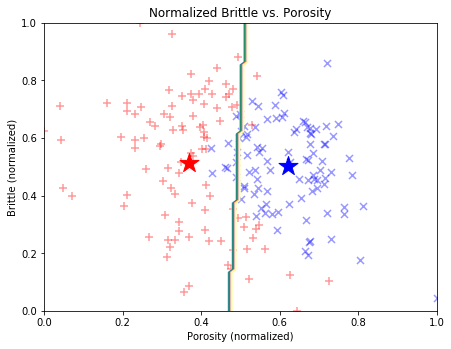

In [13]:
x = [] ; x1 = []
y = [] ; y1 =[]

x = Kcenters[:,0] ; x1 = Kcenters2[:,0] ; X = [*x,*x1]
y = Kcenters[:,1] ; y1 = Kcenters2[:,1] ; Y = [*y,*y1]


Centroid_Total = np.concatenate((Kcenters,Kcenters2))


xy2_data = list(zip(High_Por,High_Bri))
kmeans = KMeans(n_clusters=1, random_state=0).fit(xy2_data)
y_kmeans = kmeans.predict(xy2_data)
Kcenters = kmeans.cluster_centers_

xy3_data = list(zip(Low_Por,Low_Bri))
kmeans = KMeans(n_clusters=1, random_state=0).fit(xy3_data)
y_kmeans2 = kmeans.predict(xy3_data)
Kcenters2 = kmeans.cluster_centers_


plt.subplot(122)
KC1 = np.c_[Kcenters[:,0], Kcenters[:,1]]
KC2 = np.c_[Kcenters2[:,0], Kcenters2[:,1]]


CenterX = np.concatenate((KC1,KC2), axis = 0)
CenterY = np.array([1]*len(Kcenters) + [0]*len(Kcenters2))


C = 1.0  # SVM regularization parameter
n_neighbors = 1
weights = 'uniform'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(CenterX, CenterY)

h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = Centroid_Total[:,0].min() - 1, Centroid_Total[:,0].max() + 1
y_min, y_max = Centroid_Total[:,1].min() - 1, Centroid_Total[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(High_Por, High_Bri, c='blue', alpha = 0.4, linewidths=1.0, marker = 'x',s = 50, verts=None, edgecolors="black", label = "High Production")
plt.scatter(Low_Por, Low_Bri, c='red', alpha = 0.4, linewidths =1.0, marker = '+',s = 50, verts =None, label = "Low Production")
plt.title('Normalized Brittle vs. Porosity'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Brittle (normalized)')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)


for i in range(0,len(Kcenters)):
    plt.scatter(Kcenters[i,0], Kcenters[i,1], s=400,  marker = "*" , c = 'blue')
    
for i in range(0,len(Kcenters2)):
    plt.scatter(Kcenters2[i,0], Kcenters2[i,1], s=400,  marker = "*" , c = 'red')



We see exactly that! Now that we have our boundary line and our labelled data we are ready to hypertune the number of prototypes that would yield a best fit curve. 

#### Hyper-Tuning Number of Centroids

While changing the number of clusters from the minimum to the maximum allowed, we can read the predicted score and plot it against the number of centroids. From this plot we will receieve the best possible number of centroids that would yield the best feature segmentation.  

In [14]:
xy2_data = list(zip(High_Por,High_Bri))
xy3_data = list(zip(Low_Por,Low_Bri))
Xcentroids = []
NumberOfIterations = np.arange(1,97)

for i in range(1,97):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(xy2_data)
    y_kmeans = kmeans.predict(xy2_data)
    Kcenters = kmeans.cluster_centers_

    kmeans1 = KMeans(n_clusters=i, random_state=0).fit(xy3_data)
    y_kmeans2 = kmeans1.predict(xy3_data)
    Kcenters2 = kmeans1.cluster_centers_
    
    KC1 = np.c_[Kcenters[:,0], Kcenters[:,1]]
    KC2 = np.c_[Kcenters2[:,0], Kcenters2[:,1]]

    CenterX = np.concatenate((KC1,KC2), axis = 0)
    ch = kmeans.fit_predict(CenterX)
    Xcentroids.append(clf.score(CenterX,ch))

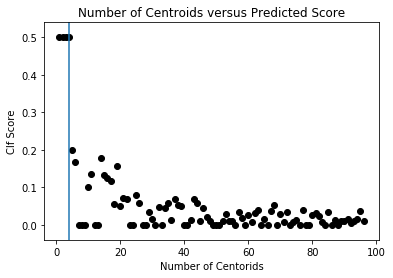

In [15]:
plt.scatter(NumberOfIterations,Xcentroids, c='black')
plt.title('Number of Centroids versus Predicted Score'); plt.xlabel('Number of Centorids'); plt.ylabel('Clf Score')
plt.axvline(x=4)

From this plot you can see a clear cutoff from 4 clusters in each group to 5 clusters. There is a significant drop and from this the best number of centroids would be a range from 2-4. Four is selected as the hypertuned number of clusters and is graphed below! 

#### Hyper-Tuned Plot

4

4


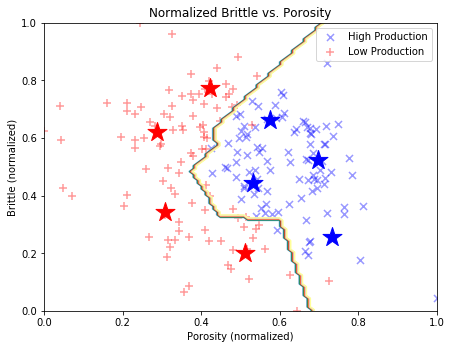

In [16]:
xy2_data = list(zip(High_Por,High_Bri))
kmeans = KMeans(n_clusters=4, random_state=0).fit(xy2_data)
y_kmeans = kmeans.predict(xy2_data)
Kcenters = kmeans.cluster_centers_
print(len(Kcenters))
#print(Kcenters)


xy3_data = list(zip(Low_Por,Low_Bri))
kmeans = KMeans(n_clusters=4, random_state=0).fit(xy3_data)
y_kmeans2 = kmeans.predict(xy3_data)
Kcenters2 = kmeans.cluster_centers_
print("")
print(len(Kcenters2))
#print(Kcenters2)

plt.subplot(122)
KC1 = np.c_[Kcenters[:,0], Kcenters[:,1]]
KC2 = np.c_[Kcenters2[:,0], Kcenters2[:,1]]


CenterX = np.concatenate((KC1,KC2), axis = 0)
CenterY = np.array([1]*len(Kcenters) + [0]*len(Kcenters2))


C = 1.0  # SVM regularization parameter
n_neighbors = 1
weights = 'uniform'
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(CenterX, CenterY)

h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = Centroid_Total[:,0].min() - 1, Centroid_Total[:,0].max() + 1
y_min, y_max = Centroid_Total[:,1].min() - 1, Centroid_Total[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(High_Por, High_Bri, c='blue', alpha = 0.4, linewidths=1.0, marker = 'x',s = 50, verts=None, edgecolors="black", label = "High Production")
plt.scatter(Low_Por, Low_Bri, c='red', alpha = 0.4, linewidths =1.0, marker = '+',s = 50, verts =None, label = "Low Production")
plt.title('Normalized Brittle vs. Porosity'); plt.xlabel('Porosity (normalized)'); plt.ylabel('Brittle (normalized)')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()

for i in range(0,len(Kcenters)):
    plt.scatter(Kcenters[i,0], Kcenters[i,1], s=400,  marker = "*" , c = 'blue')
    
for i in range(0,len(Kcenters2)):
    plt.scatter(Kcenters2[i,0], Kcenters2[i,1], s=400,  marker = "*" , c = 'red')



From this plot you can see the feature segmentation of 8 total clusters. You can also see labelled points for low/high production on the opposite side of where they are suppose to be, you could make the assumption that those points should be classified as high/low production. But keep in mind that the decision boundary line is only factoring in the locations of the centroids and not the actual data values. With that in mind, if you were to recieve another set of points you could plot it with this line and determine whether you would receive low or high production data with high certainty. 

Feel free to change around the number of centorids in each data set and see how complicated the decision boundary line gets. 

### K-Means Clustering for Classification

* Decision boundary line created in order to segment feature space
* Hypertuned number of centroids in each classified number set

#### Robert Propper, Undergraduate Student, The University of Texas at Austin

##### [LinkedIn](https://www.linkedin.com/in/robertpropper/)

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Comments

This was a workflow covering K-means clustering for Classification. 

The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Robert Propper* and *Michael*

***

#### More on Michael Pyrcz and the Texas Center for Data Analytics and Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
